In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data_files = [ 'IBMStock.csv', 'GEStock.csv', 'ProcterGambleStock.csv', 'CocaColaStock.csv', 'BoeingStock.csv']
data_files_short =[f.split('Stock.csv')[0] for f in data_files]

In [26]:
data_files

['IBMStock.csv',
 'GEStock.csv',
 'ProcterGambleStock.csv',
 'CocaColaStock.csv',
 'BoeingStock.csv']

In [27]:
for f in data_files_short:
    print 'df_{0} = pd.read_csv(\'{0}Stock.csv\',parse_dates=[\'Date\'])'.format(f)

df_IBM = pd.read_csv('IBMStock.csv',parse_dates=['Date'])
df_GE = pd.read_csv('GEStock.csv',parse_dates=['Date'])
df_ProcterGamble = pd.read_csv('ProcterGambleStock.csv',parse_dates=['Date'])
df_CocaCola = pd.read_csv('CocaColaStock.csv',parse_dates=['Date'])
df_Boeing = pd.read_csv('BoeingStock.csv',parse_dates=['Date'])


In [23]:
df_IBM = pd.read_csv('IBMStock.csv',parse_dates=['Date'])
df_GE = pd.read_csv('GEStock.csv',parse_dates=['Date'])
df_ProcterGamble = pd.read_csv('ProcterGambleStock.csv',parse_dates=['Date'])
df_CocaCola = pd.read_csv('CocaColaStock.csv',parse_dates=['Date'])
df_Boeing = pd.read_csv('BoeingStock.csv',parse_dates=['Date'])

Problem 1.1 - Summary Statistics
1 point possible (graded)
Before working with these data sets, we need to convert the dates into a format that R can understand. Take a look at the structure of one of the datasets using the str function. Right now, the date variable is stored as a factor. We can convert this to a "Date" object in R by using the following five commands (one for each data set):

IBM$Date = as.Date(IBM$Date, "%m/%d/%y")

GE$Date = as.Date(GE$Date, "%m/%d/%y")

CocaCola$Date = as.Date(CocaCola$Date, "%m/%d/%y")

ProcterGamble$Date = as.Date(ProcterGamble$Date, "%m/%d/%y")

Boeing$Date = as.Date(Boeing$Date, "%m/%d/%y")

The first argument to the as.Date function is the variable we want to convert, and the second argument is the format of the Date variable. We can just overwrite the original Date variable values with the output of this function. Now, answer the following questions using the str and summary functions.

Our five datasets all have the same number of observations. How many observations are there in each data set?

In [28]:
df_IBM.shape

(480, 2)

Problem 1.2 - Summary Statistics
1 point possible (graded)
What is the earliest year in our datasets?

In [36]:
df_IBM.head()

,Date,StockPrice
0,1970-01-01,360.319048
1,1970-02-01,346.723684
2,1970-03-01,327.345714
3,1970-04-01,319.852727
4,1970-05-01,270.375238


Problem 1.3 - Summary Statistics
1 point possible (graded)
What is the latest year in our datasets?



In [38]:
df_IBM.tail()

,Date,StockPrice
475,2009-08-01,118.430952
476,2009-09-01,119.055714
477,2009-10-01,122.239546
478,2009-11-01,125.273500
479,2009-12-01,128.896364


Problem 1.4 - Summary Statistics
1 point possible (graded)
What is the mean stock price of IBM over this time period?

In [40]:
df_IBM.StockPrice.mean()

144.3750303076664

Problem 1.5 - Summary Statistics
1 point possible (graded)
What is the minimum stock price of General Electric (GE) over this time period?

In [43]:
df_GE.StockPrice.min()

9.2936363639999993

Problem 1.6 - Summary Statistics
1 point possible (graded)
What is the maximum stock price of Coca-Cola over this time period?

In [45]:
df_CocaCola.StockPrice.max()

146.58428569999998

Problem 1.7 - Summary Statistics
1 point possible (graded)
What is the median stock price of Boeing over this time period?

In [47]:
df_Boeing.StockPrice.median()

44.88339827

Problem 1.8 - Summary Statistics
1 point possible (graded)
What is the standard deviation of the stock price of Procter & Gamble over this time period?

In [49]:
df_ProcterGamble.StockPrice.std()

18.19414030797156

Problem 2.1 - Visualizing Stock Dynamics
2 points possible (graded)
Let's plot the stock prices to see if we can visualize trends in stock prices during this time period. Using the plot function, plot the Date on the x-axis and the StockPrice on the y-axis, for Coca-Cola.

This plots our observations as points, but we would really like to see a line instead, since this is a continuous time period. To do this, add the argument type="l" to your plot command, and re-generate the plot (the character is quotes is the letter l, for line). You should now see a line plot of the Coca-Cola stock price.

Around what year did Coca-Cola has its highest stock price in this time period?

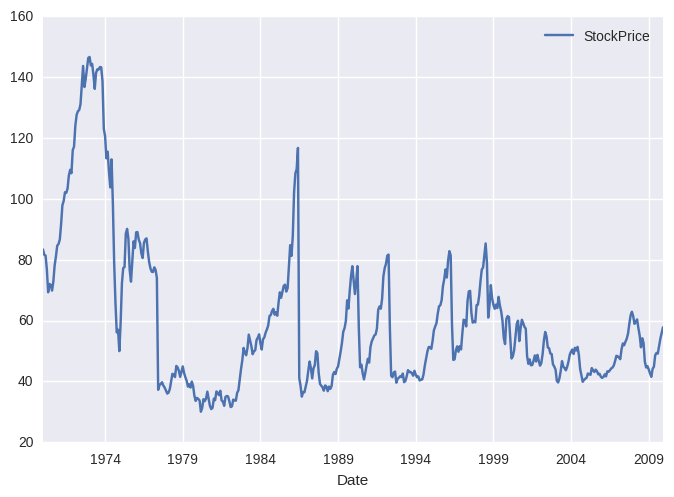

In [52]:
df_CocaCola.set_index('Date').plot()


In [ ]:
df_CocaCola[df_CocaCola.StockPrice == df_CocaCola.StockPrice.max()]

In [57]:
df_CocaCola[df_CocaCola.StockPrice == df_CocaCola.StockPrice.min()]

,Date,StockPrice
122,1980-03-01,30.057143


Problem 2.2 - Visualizing Stock Dynamics
1 point possible (graded)
Now, let's add the line for Procter & Gamble too. You can add a line to a plot in R by using the lines function instead of the plot function. Keeping the plot for Coca-Cola open, type in your R console:

lines(ProcterGamble$Date, ProcterGamble$StockPrice)

Unfortunately, it's hard to tell which line is which. Let's fix this by giving each line a color. First, re-run the plot command for Coca-Cola, but add the argument col="red". You should see the plot for Coca-Cola show up again, but this time in red. Now, let's add the Procter & Gamble line (using the lines function like we did before), adding the argument col="blue". You should now see in your plot the Coca-Cola stock price in red, and the Procter & Gamble stock price in blue.

As an alternative choice to changing the colors, you could instead change the line type of the Procter & Gamble line by adding the argument lty=2. This will make the Procter & Gamble line dashed.

Using this plot, answer the following questions.

In March of 2000, the technology bubble burst, and a stock market crash occurred. According to this plot, which company's stock dropped more?

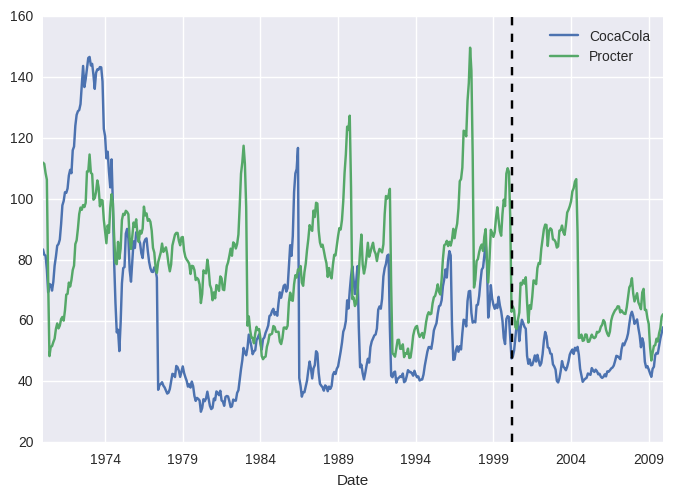

In [68]:
ax = df_CocaCola.set_index('Date').plot()
df_ProcterGamble.set_index('Date').plot(ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.axvline('2000-03-01', color='k', linestyle='--')
ax.legend(["CocaCola", "Procter"])  

Problem 2.3 - Visualizing Stock Dynamics
2 points possible (graded)
Answer these questions using the plot you generated in the previous problem.

Around 1983, the stock for one of these companies (Coca-Cola or Procter and Gamble) was going up, while the other was going down. Which one was going up?


In the time period shown in the plot, which stock generally has lower values?




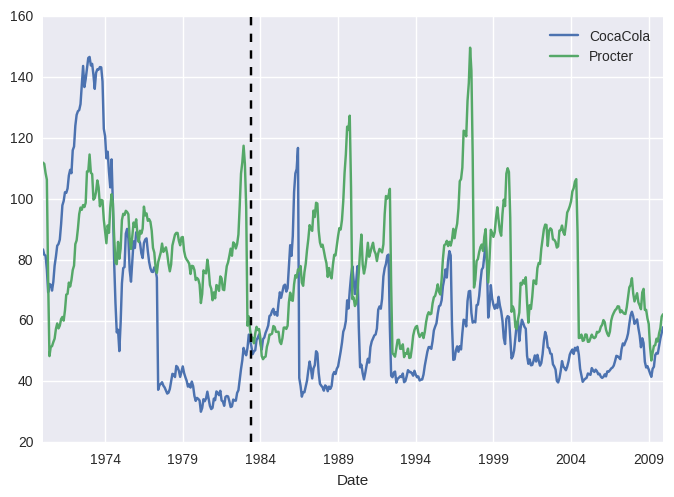

In [69]:
ax = df_CocaCola.set_index('Date').plot()
df_ProcterGamble.set_index('Date').plot(ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.axvline('1983-06-15', color='k', linestyle='--')
ax.legend(["CocaCola", "Procter"])  

Problem 3.1 - Visualizing Stock Dynamics 1995-2005
1 point possible (graded)
Let's take a look at how the stock prices changed from 1995-2005 for all five companies. In your R console, start by typing the following plot command:

plot(CocaCola$Date[301:432], CocaCola$StockPrice[301:432], type="l", col="red", ylim=c(0,210))

This will plot the CocaCola stock prices from 1995 through 2005, which are the observations numbered from 301 to 432. The additional argument, ylim=c(0,210), makes the y-axis range from 0 to 210. This will allow us to see all of the stock values when we add in the other companies.

Now, use the lines function to add in the other four companies, remembering to only plot the observations from 1995 to 2005, or [301:432]. You don't need the "type" or "ylim" arguments for the lines function, but remember to make each company a different color so that you can tell them apart. Some color options are "red", "blue", "green", "purple", "orange", and "black". To see all of the color options in R, type colors() in your R console.

(If you prefer to change the type of the line instead of the color, here are some options for changing the line type: lty=2 will make the line dashed, lty=3 will make the line dotted, lty=4 will make the line alternate between dashes and dots, and lty=5 will make the line long-dashed.)

Use this plot to answer the following four questions.

Which stock fell the most right after the technology bubble burst in March 2000?

(348, 372)

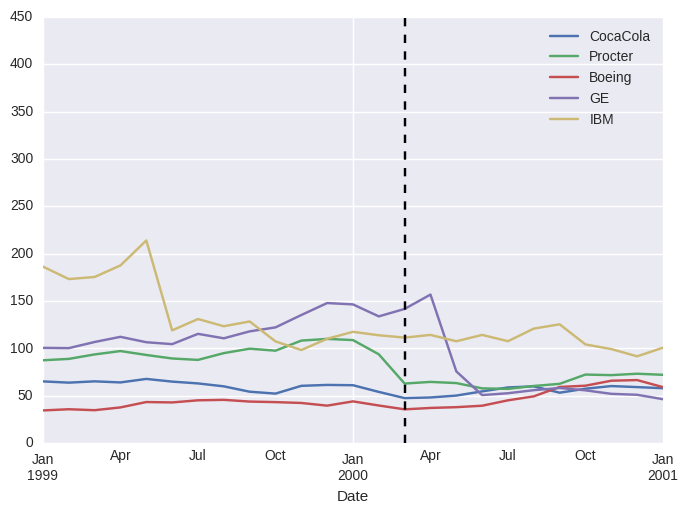

In [82]:
ax = df_CocaCola.set_index('Date').plot()
df_ProcterGamble.set_index('Date').plot(ax=ax)
df_Boeing.set_index('Date').plot(ax=ax)
df_GE.set_index('Date').plot(ax=ax)
df_IBM.set_index('Date').plot(ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.axvline('2000-03-01', color='k', linestyle='--')
ax.legend(["CocaCola", "Procter",'Boeing','GE','IBM'])  
ax.set_xlim(['1999-01-01','2001-01-01'])

Problem 3.2 - Visualizing Stock Dynamics 1995-2005
1 point possible (graded)
Which stock reaches the highest value in the time period 1995-2005?

(300, 420)

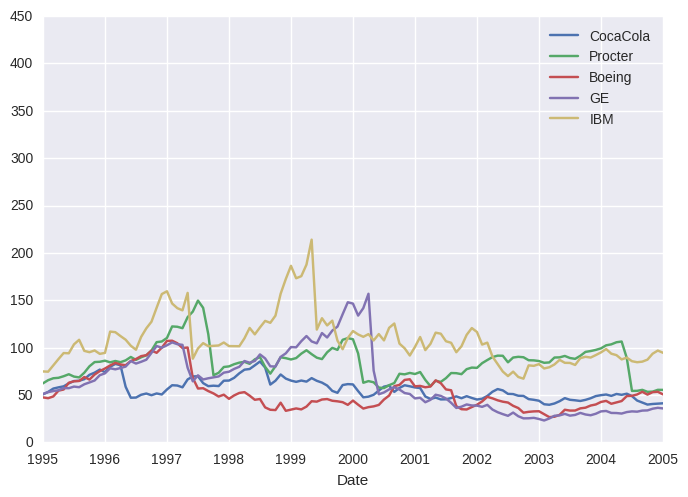

In [85]:
ax = df_CocaCola.set_index('Date').plot()
df_ProcterGamble.set_index('Date').plot(ax=ax)
df_Boeing.set_index('Date').plot(ax=ax)
df_GE.set_index('Date').plot(ax=ax)
df_IBM.set_index('Date').plot(ax=ax)
lines, labels = ax.get_legend_handles_labels()

ax.legend(["CocaCola", "Procter",'Boeing','GE','IBM'])  
ax.set_xlim(['1995-01-01','2005-01-01'])

Problem 3.3 - Visualizing Stock Dynamics 1995-2005
1 point possible (graded)
In October of 1997, there was a global stock market crash that was caused by an economic crisis in Asia. Comparing September 1997 to November 1997, which companies saw a decreasing trend in their stock price? (Select all that apply.)

(0, 200)

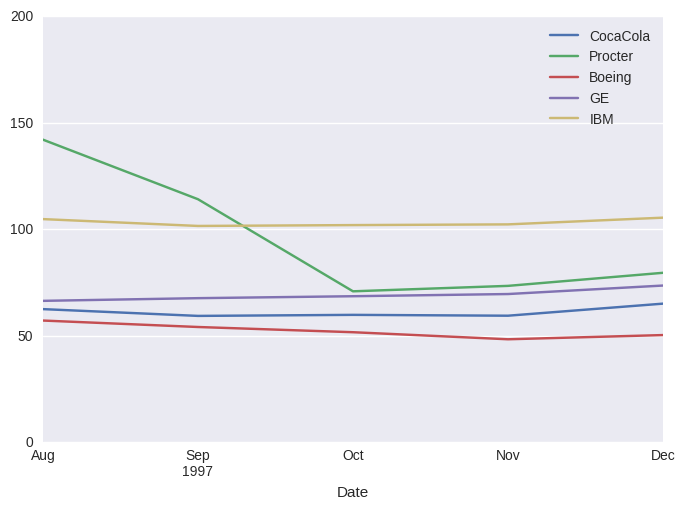

In [92]:
ax = df_CocaCola.set_index('Date').plot()
df_ProcterGamble.set_index('Date').plot(ax=ax)
df_Boeing.set_index('Date').plot(ax=ax)
df_GE.set_index('Date').plot(ax=ax)
df_IBM.set_index('Date').plot(ax=ax)
lines, labels = ax.get_legend_handles_labels()

ax.legend(["CocaCola", "Procter",'Boeing','GE','IBM'])  
ax.set_xlim(['1997-08-01','1997-12-01'])
ax.set_ylim([0,200])

Problem 3.4 - Visualizing Stock Dynamics 1995-2005
1 point possible (graded)
In the last two years of this time period (2004 and 2005) which stock seems to be performing the best, in terms of increasing stock price?

(0, 200)

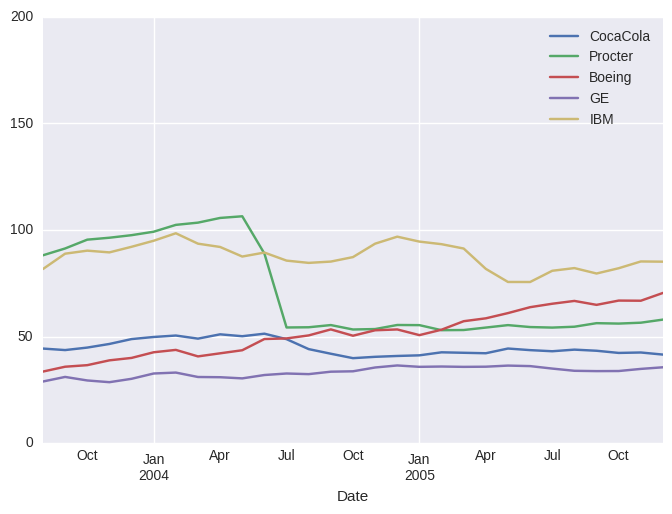

In [93]:
ax = df_CocaCola.set_index('Date').plot()
df_ProcterGamble.set_index('Date').plot(ax=ax)
df_Boeing.set_index('Date').plot(ax=ax)
df_GE.set_index('Date').plot(ax=ax)
df_IBM.set_index('Date').plot(ax=ax)
lines, labels = ax.get_legend_handles_labels()

ax.legend(["CocaCola", "Procter",'Boeing','GE','IBM'])  
ax.set_xlim(['2003-08-01','2005-12-01'])
ax.set_ylim([0,200])

Problem 4.1 - Monthly Trends
1 point possible (graded)
Lastly, let's see if stocks tend to be higher or lower during certain months. Use the tapply command to calculate the mean stock price of IBM, sorted by months. To sort by months, use

months(IBM$Date)

as the second argument of the tapply function.

For IBM, compare the monthly averages to the overall average stock price. In which months has IBM historically had a higher stock price (on average)? Select all that apply.

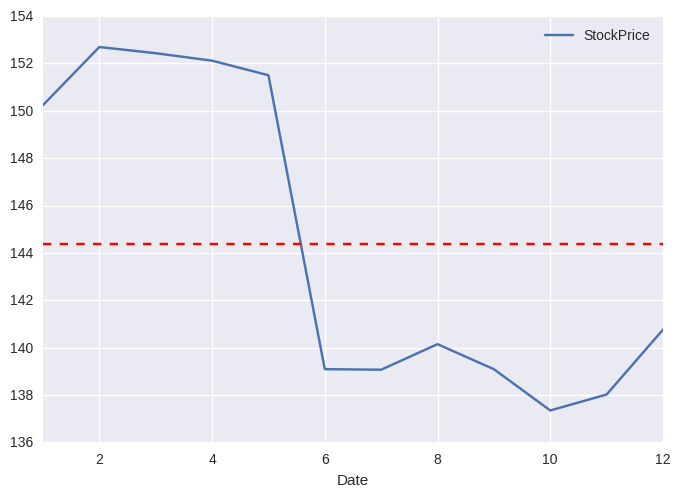

In [100]:
ax = df_IBM.groupby(df_IBM.Date.dt.month).mean().plot()
ax.axhline(df_IBM.StockPrice.mean(),color='r', linestyle='--')

